# Resonant inelastic X-ray scattering: concentration correction, and cuts through the plane

Import all the required libraries. When using `daxs` for RIXS scans, import the `Rixs` class.

In [1]:
import matplotlib.pyplot as plt

from daxs.measurements import Rixs
from daxs.sources import Hdf5Source
from daxs.utils import resources

Define the counters to process data for RIXS.

In [2]:
counters = {
    "x": ".1/measurement/hdh_energy",  # Define the X-axis, here the incident energy.
    "y": ".1/instrument/positioners/xes_en",  # Define the Y-axis, here the emission energy. # noqa
    "signal": [
        ".1/measurement/det_dtc_apd"
    ],  # Define the data counter, here is the main APD detector.
    "monitor": ".1/measurement/I02",  # Define the counter used for normalization.
}

Define the data file and the scan numbers. This example uses scans 4 to 224 to make the RIXS plane. Give first the filename, then the number of scans to include, then the number of scans to exclude (if any), and finally the counters defined above.

In [3]:
hdf5_filename = resources.getfile("Fe2O3_Ka1Ka2_RIXS.h5")
# Create a list of scans to read from the source.
scan_ids = list(range(4, 225))
source = Hdf5Source(hdf5_filename, scan_ids, data_mappings=counters)

Create an object that contains the measured data and has included functionality for processing the data. Here we use the measurement class `Rixs`. The data is defined in the source object above.

In [4]:
measurement = Rixs(source)

Define the number of the concentration correction scan.

In [5]:
conc_corr_scan = 225

Adjusts the measured data by the concentration correction.

In [6]:
measurement.concentration_correction(conc_corr_scan)

Optionally, define constant incident energy (CIE) cuts at energies 7.114 keV and 7.115 keV.

In [7]:
measurement.cut(mode="CIE", energies=[7.114, 7.115])

Plot a 2D colormap RIXS plane.

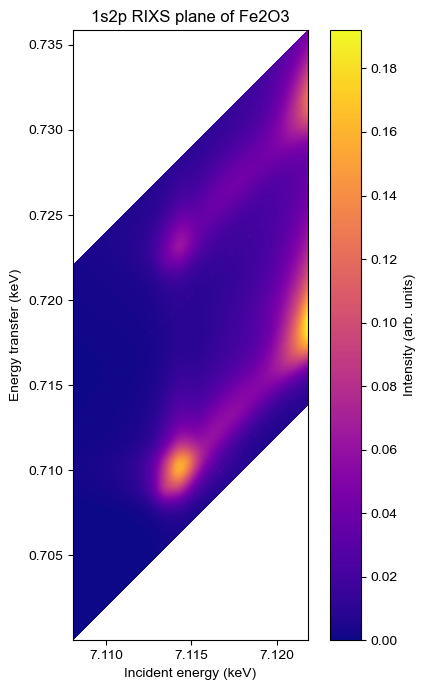

In [8]:
fig, ax = plt.subplots(figsize=(5, 7))

levels = 200
tcf = ax.tricontourf(
    measurement.x, measurement.y, measurement.signal, levels=levels, cmap="plasma"
)

cbar = fig.colorbar(tcf)
cbar.ax.set_ylabel("Intensity (arb. units)")
plt.gca().set_aspect("equal", adjustable="box")

ax.set_xlabel("Incident energy (keV)")
ax.set_ylabel("Energy transfer (keV)")
ax.set_title("1s2p RIXS plane of Fe2O3")

plt.tight_layout()
plt.show()

Plot the constant incident energy (CIE) cuts.

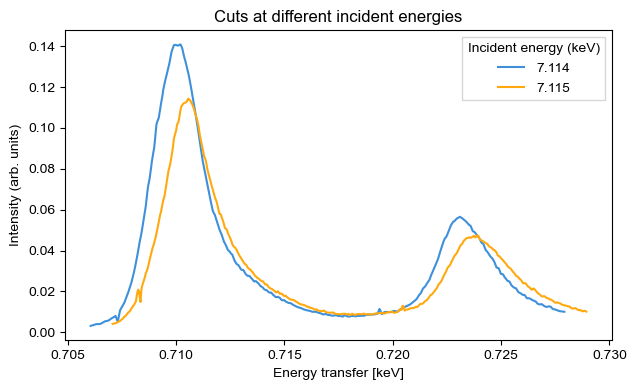

In [9]:
fig, ax = plt.subplots()

x, y, signal = measurement.cuts["CIE@7.114"]
ax.plot(y, signal, label="7.114")

x, y, signal = measurement.cuts["CIE@7.115"]
ax.plot(y, signal, label="7.115")

ax.legend(title="Incident energy (keV)")
ax.set_xlabel("Energy transfer [keV]")
ax.set_ylabel("Intensity (arb. units)")
ax.set_title("Cuts at different incident energies")

plt.tight_layout()
plt.show()